In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from teams_functions import *

# 01. Dataset loading and preparation

In [2]:
#Load the csv file
matches_df = pd.read_csv('matches_dataset_private.csv')

In [3]:
matches_df.head()

,match_number,division,date,match_time,match_pitch,local_team,visitor_team,referee_name,referee_license,local_team_player_01_jersey,...,red_cards_visitor_03_player,red_cards_visitor_04_player,red_cards_visitor_05_player,red_cards_visitor_06_player,red_cards_visitor_01_minute,red_cards_visitor_02_minute,red_cards_visitor_03_minute,red_cards_visitor_04_minute,red_cards_visitor_05_minute,red_cards_visitor_06_minute
0,9,2A,11/01/2025,14:00,Parque Deportivo Puerta de Hierro,Aeronáuticos,BigMat Tabanera Lobos Segovia,"Del Rio Blazquez, Jose Tomas",1222886,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,2A,10/11/2024,17:00,Parque Deportivo Puerta de Hierro,Aeronáuticos,Canal Red Vallecas Rugby Union,"Vezio, Tristan",1252330,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,2A,26/01/2025,11:00,Parque Deportivo Puerta de Hierro,Aeronáuticos,Getafe Club de Rugby,"Santiago Alvarez, Raquel",1225466,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,2A,30/11/2024,13:00,Parque Deportivo Puerta de Hierro,Aeronáuticos,Industriales C SlashMobility Las Rozas,"Chaves Garcia, Ignacio",1200296,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,2A,24/11/2024,12:00,Parque Deportivo Puerta de Hierro,Aeronáuticos,Rugby Unión Norte,"Teruel Caucholas, Juan Manuel",1222640,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
matches_df.loc[:, 'match_number':'visitor_team_player_23_initial_position'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Columns: 285 entries, match_number to visitor_team_player_23_initial_position
dtypes: float64(92), int64(140), object(53)
memory usage: 178.2+ KB


In [5]:
#Kepp license and jersey columns as floats since there is a combination of numeric values and non-number values (NaN)

jersey_columns = matches_df.filter(regex='player_\d{2}_jersey').columns
license_columns = matches_df.filter(regex='_license').columns
event_columns = matches_df.filter(regex='_\d{2}_player').columns #Scoreboards, substitutions and cards

#Example
print(matches_df[jersey_columns].dtypes)

local_team_player_01_jersey      float64
local_team_player_02_jersey      float64
local_team_player_03_jersey      float64
local_team_player_04_jersey      float64
local_team_player_05_jersey      float64
local_team_player_06_jersey      float64
local_team_player_07_jersey      float64
local_team_player_08_jersey      float64
local_team_player_09_jersey      float64
local_team_player_10_jersey      float64
local_team_player_11_jersey      float64
local_team_player_12_jersey      float64
local_team_player_13_jersey      float64
local_team_player_14_jersey      float64
local_team_player_15_jersey      float64
local_team_player_16_jersey      float64
local_team_player_17_jersey      float64
local_team_player_18_jersey      float64
local_team_player_19_jersey      float64
local_team_player_20_jersey      float64
local_team_player_21_jersey      float64
local_team_player_22_jersey      float64
local_team_player_23_jersey      float64
visitor_team_player_01_jersey    float64
visitor_team_pla

In [6]:
#Check for completely empty columns

df_columns = len(matches_df.columns)
df_columns_clean = len(matches_df.dropna(axis=1, how='all').columns)

print('Original number of columns: ', df_columns)
print ('Number of columns after cleaning: ', df_columns_clean)

print('Total number of columns to drop: ', df_columns - df_columns_clean)
print('Set of columns to be droped (player, type, minute: ', (df_columns - df_columns_clean)/3)

Original number of columns:  601
Number of columns after cleaning:  511
Total number of columns to drop:  90
Set of columns to be droped (player, type, minute:  30.0


In [7]:
matches_df.dropna(axis=1, how='all', inplace=True)

In [8]:
#Date parsing
#Parsing to date format the column 'date'

matches_df['date'] = pd.to_datetime(matches_df['date'], dayfirst=True)
matches_df['match_time'] = pd.to_datetime(matches_df['match_time'], format='%H:%M').dt.time

In [9]:
#Sort matches by date and hour
matches_df.sort_values(['date', 'match_time'], inplace=True)

#Reset index
matches_df.reset_index(drop=True, inplace=True)

In [10]:
matches_df.head()

,match_number,division,date,match_time,match_pitch,local_team,visitor_team,referee_name,referee_license,local_team_player_01_jersey,...,yellow_cards_visitor_03_player,yellow_cards_visitor_01_minute,yellow_cards_visitor_02_minute,yellow_cards_visitor_03_minute,red_cards_local_01_type,red_cards_local_01_player,red_cards_local_01_minute,red_cards_visitor_01_type,red_cards_visitor_01_player,red_cards_visitor_01_minute
0,1,2A,2024-10-05,13:00:00,Universidad Alfonso X el Sabio,C.R Majadahonda,Canal Red Vallecas Rugby Union,"Bernal Zuñiga, Rodrigo",1236990,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2A,2024-10-05,14:00:00,Campo de Hortaleza,XV Hortaleza Rojo,Complutense Cisneros Palito V,"Del Rio Blazquez, Jose Tomas",1222886,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2A,2024-10-05,15:00:00,Campo Alcalá (Luisón Abad),Club Rugby Alcalá,Aeronáuticos,"Gonzalez Villasante, Javier",1242616,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2A,2024-10-05,16:00:00,Campo de Tres Cantos (Polideportivo de la Luz),Rugby Unión Norte,BigMat Tabanera Lobos Segovia,"Alcaraz Guillem, Tomas",1242763,1.0,...,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2A,2024-10-06,12:00:00,Campo de Getafe (El Bercial),Getafe Club de Rugby,Industriales C SlashMobility Las Rozas,"Gomez Argandoña, Manuel Bartolomé",1226709,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 02. Calculate results

In [11]:
matches_df = results_calculator(matches_df)
matches_df[['local_team', 'local_scoreboard_points', 'visitor_scoreboard_points', 'visitor_team']].head()

#Results are correct compared to matches reports in pdf

Scoreboard values:  {'E': 5, 'T': 2, 'PC': 3, 'D': 3, 'EC': 5}


,local_team,local_scoreboard_points,visitor_scoreboard_points,visitor_team
0,C.R Majadahonda,97.0,5.0,Canal Red Vallecas Rugby Union
1,XV Hortaleza Rojo,10.0,67.0,Complutense Cisneros Palito V
2,Club Rugby Alcalá,72.0,14.0,Aeronáuticos
3,Rugby Unión Norte,24.0,17.0,BigMat Tabanera Lobos Segovia
4,Getafe Club de Rugby,10.0,41.0,Industriales C SlashMobility Las Rozas


# 03. Change jersey number by license number

To handle the dataset with a unique number id for every player. 

In [12]:
matches_df = jersey_to_license(matches_df)

# 4. Teams Analysis

- How many players they have per match?

## 4.1. Statistics 
- How many players they have durig the competition? (later)
- How teams perform during...
    - the first 10 minutes of the match?
    - the first 10 minutes of the second half?
    - the last 20 minutes of the match?

In [13]:
#List every team from competition

teams_list = matches_df[['local_team', 'visitor_team']].stack().unique()

for i, team in enumerate(teams_list): 
    print(i, ": ", team)

0 :  C.R Majadahonda 
1 :  Canal Red Vallecas Rugby Union 
2 :  XV Hortaleza Rojo 
3 :  Complutense Cisneros Palito V 
4 :  Club Rugby Alcalá 
5 :  Aeronáuticos 
6 :  Rugby Unión Norte 
7 :  BigMat Tabanera Lobos Segovia 
8 :  Getafe Club de Rugby 
9 :  Industriales C SlashMobility Las Rozas 
10 :  Rugby Alcorcón 
11 :  Jabatos Móstoles R.C. 


## How many players do teams have per match?



In [14]:
#Apply players function calculator 
matches_df = number_of_players(matches_df)

In [15]:
columns = ['date', 'local_team', 'local_scoreboard_points', 'visitor_scoreboard_points', 'visitor_team', 'local_team_players', 'visitor_team_players']

matches_df[columns].head()

,date,local_team,local_scoreboard_points,visitor_scoreboard_points,visitor_team,local_team_players,visitor_team_players
0,2024-10-05,C.R Majadahonda,97.0,5.0,Canal Red Vallecas Rugby Union,23,18
1,2024-10-05,XV Hortaleza Rojo,10.0,67.0,Complutense Cisneros Palito V,21,22
2,2024-10-05,Club Rugby Alcalá,72.0,14.0,Aeronáuticos,23,17
3,2024-10-05,Rugby Unión Norte,24.0,17.0,BigMat Tabanera Lobos Segovia,22,22
4,2024-10-06,Getafe Club de Rugby,10.0,41.0,Industriales C SlashMobility Las Rozas,21,21


Interesting how in the first day of competition two teams (Vallecas and Aeronáuticos) had only 3 and 2 changes respectively (remember that in rugby are 15 players from the begining with 8 bench players) and there is a big gap in scoreboard for these two matches. 

## 4.2. Statistics about the teams
- Plot their scoreboard results as plot bars

In [16]:
#To begin the Statistical Analysis it is first necessary to create a dataframe per team
#Create the team dataframe for Alcorcón
team_to_study = teams_list[10] 
team_df = create_team_df(matches_df, team_to_study)

print('The team to study is the: ', team_to_study)

The team to study is the:  Rugby Alcorcón 


In [46]:
teams_df = pd.DataFrame()

for team in teams_list:
    if teams_df is None: 
        teams_df = team_df = create_team_df(matches_df, team_to_study).copy()
    else:
        teams_df = pd.concat([teams_df, create_team_df(matches_df, team)], ignore_index=True)

teams_df.tail()

,match_number,division,date,match_time,match_pitch,team,rival_team,as_local,referee_name,referee_license,...,penalty_kick,drop,penalty_try,rival_try,rival_conversion,rival_penalty_kick,rival_drop,rival_penalty_try,team_players,rival_team_players
155,7,2A,2024-11-30,10:45:00,Campo de Paraninfo,Jabatos Móstoles R.C.,Complutense Cisneros Palito V,0,"Pando Junco, Diego",1242626,...,0,0,0,7,6,0,0,0,21,23
156,8,2A,2024-12-14,14:30:00,Móstoles (Polideportivo Andrés Torrejón),Jabatos Móstoles R.C.,Aeronáuticos,1,"Gonzalez Elias, Martin",1249404,...,0,0,0,0,0,0,0,0,22,15
157,9,2A,2025-01-12,11:00:00,Campo de las Rozas (El Cantizal),Jabatos Móstoles R.C.,Industriales C SlashMobility Las Rozas,0,"Malegarie Ribes, Paulo Cesar",1238436,...,0,0,0,10,4,0,0,0,18,21
158,10,2A,2025-01-18,16:00:00,Campo de Tres Cantos (Polideportivo de la Luz),Jabatos Móstoles R.C.,Rugby Unión Norte,0,"Delgado Del Arco, Carlos",1244678,...,0,0,0,5,4,0,0,0,22,19
159,11,2A,2025-01-25,15:00:00,Móstoles (Polideportivo Andrés Torrejón),Jabatos Móstoles R.C.,BigMat Tabanera Lobos Segovia,1,"Gonzalez Villasante, Javier",1242616,...,0,0,0,8,6,0,0,0,18,22


In [48]:
#Correct the data type for some columns 
for i in teams_df.columns:
    #For license columns turn these into strings
    if ('license' or 'jersey') in i:
        teams_df[i] =  teams_df[i].astype('str').str.replace(r'\.0$', '', regex=True)
    #For scoreboard turn these into integers
    elif 'scoreboard' in i:
        #print(i)
        try:
            teams_df[i] = teams_df[i].astype('int64')
        except: 
            continue



In [49]:
teams_df[['team', 'date','team_player_01_license_number', 'team_player_01_jersey', 'team_player_01_name', 'team_player_01_initial_position', 'scoreboard_points']].head()

,team,date,team_player_01_license_number,team_player_01_jersey,team_player_01_name,team_player_01_initial_position,scoreboard_points
0,C.R Majadahonda,2024-10-05,1247680,1.0,"González Vargas, Pablo",1,97
1,C.R Majadahonda,2024-10-13,1247680,1.0,"González Vargas, Pablo",1,12
2,C.R Majadahonda,2024-10-26,1247680,1.0,"González Vargas, Pablo",1,90
3,C.R Majadahonda,2024-11-09,1232887,1.0,"Gutierrez Garcia, Fernando",1,29
4,C.R Majadahonda,2024-11-16,1240543,1.0,"Caballero Montiel, Jerson Paul",1,69


In [50]:
teams_df.to_csv('teams_df.csv', index=False, encoding="utf-8-sig", decimal='.', sep=';')

In [46]:
test_df = pd.read_csv('teams_df.csv', sep=';')
test_df['scoreboard_points'].astype(int)

0      97
1      12
2      90
3      29
4      69
       ..
155    14
156    10
157     0
158    28
159    21
Name: scoreboard_points, Length: 160, dtype: int32

In [30]:
matches_df.columns[100:200]

Index(['local_team_player_23_name', 'local_team_player_01_license_number',
       'local_team_player_02_license_number',
       'local_team_player_03_license_number',
       'local_team_player_04_license_number',
       'local_team_player_05_license_number',
       'local_team_player_06_license_number',
       'local_team_player_07_license_number',
       'local_team_player_08_license_number',
       'local_team_player_09_license_number',
       'local_team_player_10_license_number',
       'local_team_player_11_license_number',
       'local_team_player_12_license_number',
       'local_team_player_13_license_number',
       'local_team_player_14_license_number',
       'local_team_player_15_license_number',
       'local_team_player_16_license_number',
       'local_team_player_17_license_number',
       'local_team_player_18_license_number',
       'local_team_player_19_license_number',
       'local_team_player_20_license_number',
       'local_team_player_21_license_number',
     

<Axes: title={'center': 'scoreboard_points'}, xlabel='[team]'>

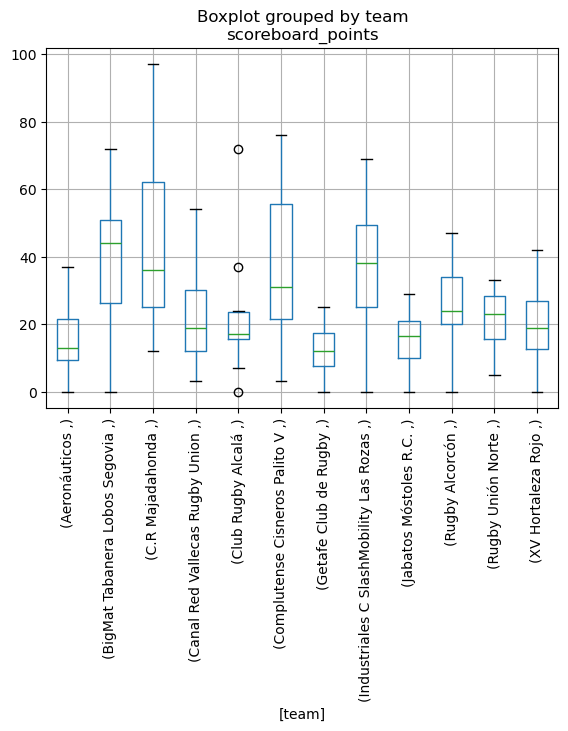

In [32]:
teams_df.boxplot('scoreboard_points', by=['team'], rot=90)

In [ ]:
#General points histograms in time
def points_to_histogram(team_df, team_to_study):
    #Create a figure
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    team_score_minutes_list = []
    rival_score_minutes_list = []

    #Run through every column
    for i in range(1, 27):

        #Get the tries minutes for team
        team_score_minutes_series = team_df[team_df[f'scoreboard_{i:02d}_type'].notna()][f'scoreboard_{i:02d}_minute']
        team_score_minutes_list = team_score_minutes_list + team_score_minutes_series.tolist()

        try:
            #Get the tries minutes for rival
            rival_score_minutes_series = team_df[team_df[f'scoreboard_rival_{i:02d}_type'].notna()][f'scoreboard_rival_{i:02d}_minute']
            rival_score_minutes_list = rival_score_minutes_list + rival_score_minutes_series.tolist()

        except KeyError:
            pass

    #Create a histogram for the points made by the team
    sns.histplot(x=team_score_minutes_list, bins=range(0, 90, 10), ax=ax[0])
    sns.histplot(x=rival_score_minutes_list, bins=range(0, 90, 10), color='orange', ax=ax[1])

    ax[0].set_title(f'{team_to_study}scoring actions in favour')
    ax[1].set_title(f'{team_to_study}scoring actions against')

    plt.show()

    return 

In [ ]:
#Tries and penalties in time
def tries_to_histogram(team_df, team_to_study):

    for action in ['E', 'PC']:

        #Create a figure
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))

        team_tries_minutes_list = []
        rival_tries_minutes_list = []

        #Run through every column
        for i in range(1, 27):

            #Get the tries minutes for team
            team_tries_minutes_series = team_df[team_df[f'scoreboard_{i:02d}_type'] == action][f'scoreboard_{i:02d}_minute']
            team_tries_minutes_list = team_tries_minutes_list + team_tries_minutes_series.tolist()

            try:
                #Get the tries minutes for rival
                rival_tries_minutes_series = team_df[team_df[f'scoreboard_rival_{i:02d}_type'] == action][f'scoreboard_rival_{i:02d}_minute']
                rival_tries_minutes_list = rival_tries_minutes_list + rival_tries_minutes_series.tolist()

            except KeyError:
                pass

        #team_df[team_df[y_axis_columns] == 'E']['scoreboard_01_type'].head()
        sns.histplot(x=team_tries_minutes_list, bins=range(0,90,10), ax=ax[0])
        sns.histplot(x=rival_tries_minutes_list, bins=range(0,90,10), color='orange', ax=ax[1])

        if action == 'E':
            ax[0].set_title(f'{team_to_study}tries in favour')
            ax[1].set_title(f'{team_to_study}tries against')
        elif action == 'PC':
            ax[0].set_title(f'{team_to_study}penalties in favour')
            ax[1].set_title(f'{team_to_study}panlties against')
        

        plt.show()

    return 


In [ ]:
#Plot the general scoreboards in time and the tries and penalties in time for the team to study
points_to_histogram(team_df, team_to_study)
tries_to_histogram(team_df, team_to_study)

- Generate an histogram to check the substitions for the team to study 

In [ ]:
#Ge